<a href="https://colab.research.google.com/github/adityarc19/Ball-images-classifier/blob/master/balls_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### We are going to be implementing an image classifier with 15 types of sports balls. The data is collected manually from Google Images using the Google Chrome extension [Fatkun Batch Download Image](https://chrome.google.com/webstore/detail/fatkun-batch-download-ima/nnjjahlikiabnchcpehcpkdeckfgnohf?hl=en) 

In [1]:
#make sure fastai is up to date 
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [2]:
#read in standard data science libs
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
#import google drive package
from  google.colab import drive

In [4]:
from fastai.vision import *

In [5]:
# connect workbook to google drive folder to access images 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [6]:
#save path to project folder 
root_path = 'gdrive/My Drive/AI_Projects/'

In [7]:
# to make balls folder 
(Path(root_path)/'Balls').mkdir(parents=True, exist_ok=True)

In [8]:
#save path for balls folder that contains images and variable tags 
proj_path = 'gdrive/My Drive/AI_Projects/Balls/'

In [9]:
#make folder names 
folders = ['golf','baseball','basketball','soccer','tennis','bowling','lacrosse','american_football','rugby','cricket','volleyball','dragon','pool','hockey','softball']

In [10]:
#create all folders in /Balls
for i in folders:
  path = Path(proj_path)
  dest = (path/i).mkdir(parents=True, exist_ok=True)

In [11]:
#save fastai path 
p_path = Path(proj_path)

In [12]:
# create image data bunch with 80/20 train test split 
np.random.seed(42)
data = ImageDataBunch.from_folder(p_path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [16]:
data

ImageDataBunch;

Train: LabelList (602 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
golf,golf,golf,golf,golf
Path: gdrive/My Drive/AI_Projects/Balls;

Valid: LabelList (150 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
dragon,dragon,cricket,baseball,tennis
Path: gdrive/My Drive/AI_Projects/Balls;

Test: None

In [13]:
data.classes

['american_football',
 'baseball',
 'basketball',
 'bowling',
 'cricket',
 'dragon',
 'golf',
 'hockey',
 'lacrosse',
 'pool',
 'rugby',
 'soccer',
 'softball',
 'tennis',
 'volleyball']

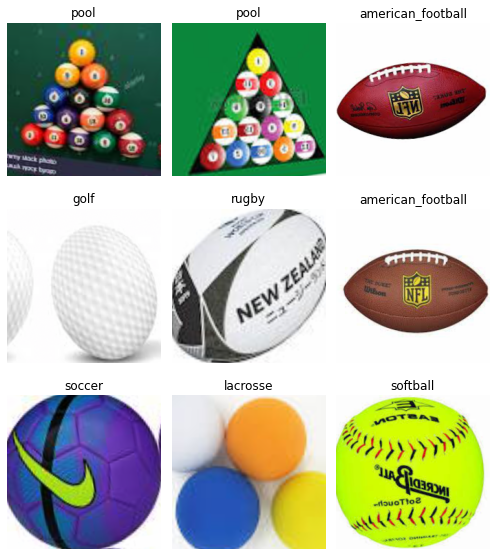

In [14]:
#show sample of images 
data.show_batch(rows=3,figsize=(7,8))

In [15]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['american_football',
  'baseball',
  'basketball',
  'bowling',
  'cricket',
  'dragon',
  'golf',
  'hockey',
  'lacrosse',
  'pool',
  'rugby',
  'soccer',
  'softball',
  'tennis',
  'volleyball'],
 15,
 602,
 150)

In [19]:
defaults.device = torch.device('cuda')

In [20]:
torch.cuda.is_available()

True

In [17]:
import warnings
warnings.filterwarnings('ignore')

## Model training : Resnet34

In [27]:
#create cnn_learner object
# use resnet 34 for transfer learning 
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [28]:
learn

Learner(data=ImageDataBunch;

Train: LabelList (602 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
golf,golf,golf,golf,golf
Path: gdrive/My Drive/AI_Projects/Balls;

Valid: LabelList (150 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
dragon,dragon,cricket,baseball,tennis
Path: gdrive/My Drive/AI_Projects/Balls;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, e

In [29]:
# train 4 epochs of the model 
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,3.320731,0.687004,0.786667,00:06
1,1.822616,0.518000,0.873333,00:06
2,1.193850,0.439332,0.893333,00:06
3,0.869024,0.418049,0.893333,00:06


We started from 78% and reached 89% in just 4 eopchs. At this point, we save our current model.

In [30]:
#save model
learn.save('model1_res34', return_path=True)

PosixPath('gdrive/My Drive/AI_Projects/Balls/models/model1_res34.pth')

In [31]:
# unfreeze model. Lets you train earlier layers 
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


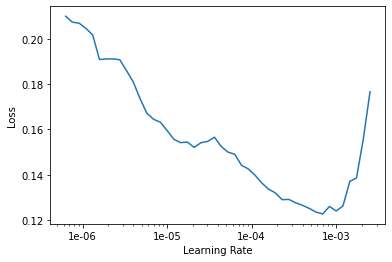

In [32]:
#find optimal learning rates 
learn.lr_find()
learn.recorder.plot()

In [34]:
learn.fit_one_cycle(6, max_lr=slice(3e-5,3e-4))   # Choose appropriate hyperparameters of learning rates.

epoch,train_loss,valid_loss,accuracy,time
0,0.035355,0.400653,0.913333,00:06
1,0.040274,0.369420,0.913333,00:06
2,0.033067,0.371659,0.906667,00:06
3,0.028899,0.344302,0.906667,00:06
4,0.028368,0.335267,0.933333,00:06
5,0.024075,0.339036,0.926667,00:06


We have reached to about 92% by now.

In [35]:
learn.save('model2_res34', return_path=True)

PosixPath('gdrive/My Drive/AI_Projects/Balls/models/model2_res34.pth')

## Data Cleaning

Fastai gives us a way to clean the data further using a built-in widget app. It also provides a way to clean unwanted images manually. The cleaned data is saved as a csv file in the given path.

In [36]:
from fastai.widgets import *

In [37]:
ds, idxs = DatasetFormatter().from_toplosses(learn)

In [38]:
ImageCleaner(ds, idxs, p_path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [39]:
df = pd.read_csv(p_path/'cleaned.csv', header='infer')
df.head()

,name,label
0,golf/2Q__ (5).jpg,golf
1,golf/2Q__.jpg,golf
2,golf/Z.jpg,golf
3,golf/2Q__ (4).jpg,golf
4,golf/2Q__ (1).jpg,golf


Checking for inconsistencies:

In [40]:
df[(df['name'].apply(lambda x: len(x)<5))]

,name,label


Extract the images from the dataframe df

In [41]:
np.random.seed(42)
db = (ImageList.from_df(df, p_path)
                   .random_split_by_pct(0.2)
                   .label_from_df()
                   .transform(get_transforms(), size=224)
                   .databunch(bs=8)).normalize(imagenet_stats)

In [42]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['american_football',
  'baseball',
  'basketball',
  'bowling',
  'cricket',
  'dragon',
  'golf',
  'hockey',
  'lacrosse',
  'pool',
  'rugby',
  'soccer',
  'softball',
  'tennis',
  'volleyball'],
 15,
 602,
 150)

In [43]:
db.classes, db.c, len(db.train_ds), len(db.valid_ds)

(['american_football',
  'baseball',
  'basketball',
  'bowling',
  'cricket',
  'dragon',
  'golf',
  'hockey',
  'lacrosse',
  'pool',
  'rugby',
  'soccer',
  'softball',
  'tennis',
  'volleyball'],
 15,
 482,
 120)

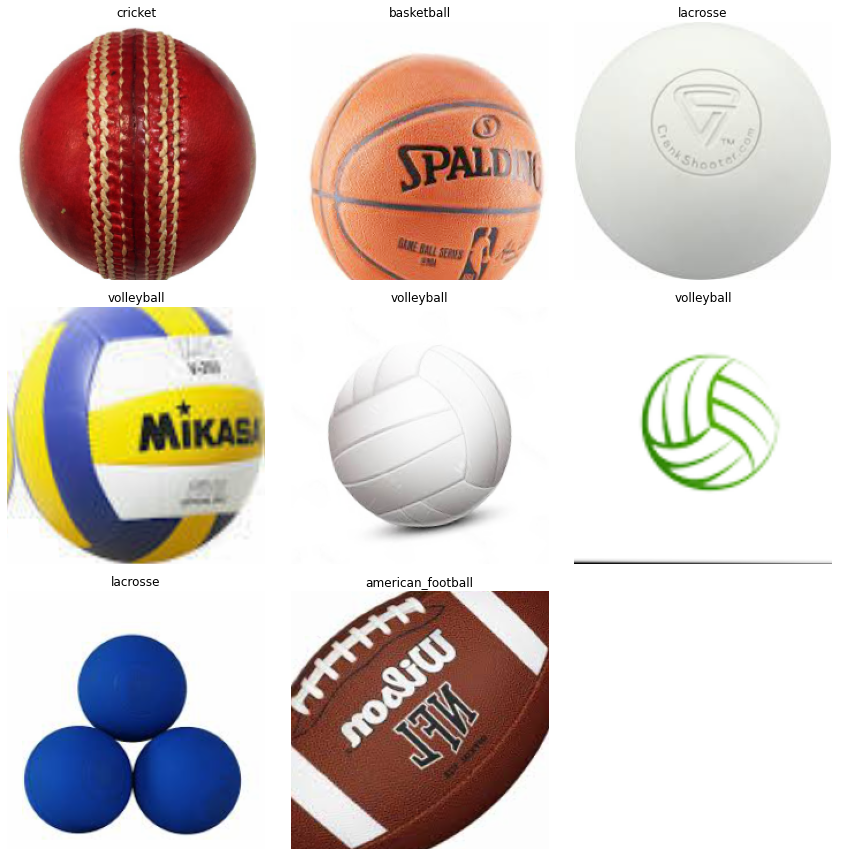

In [44]:
db.show_batch()

Now, update the 'learn' model with the cleaned dataset and start training again.

In [45]:
learn.data = db

In [46]:
learn.freeze()
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,accuracy,time
0,0.256384,0.001161,1.000000,00:05
1,0.390860,0.029643,0.991667,00:05
2,0.446456,0.024241,0.991667,00:05
3,0.384048,0.017040,1.000000,00:05
4,0.337129,0.010250,1.000000,00:05
5,0.225344,0.007211,1.000000,00:05


Clearly, we have reached 100% accuracy. So we save this model.

In [47]:
#save model
learn.save('model3_res34', return_path=True)

PosixPath('gdrive/My Drive/AI_Projects/Balls/models/model3_res34.pth')

## Evaluation of results

The best way to evaluate our results is to make a confusion matrix.

In [48]:
interp = ClassificationInterpretation.from_learner(learn)

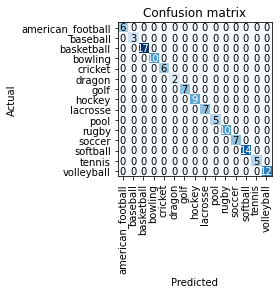

In [49]:
#plot results of model on validation set 
interp.plot_confusion_matrix()

As expected, we do not have any misclassified images.
We can also see our top losses visually (although we dont have any in this instance)

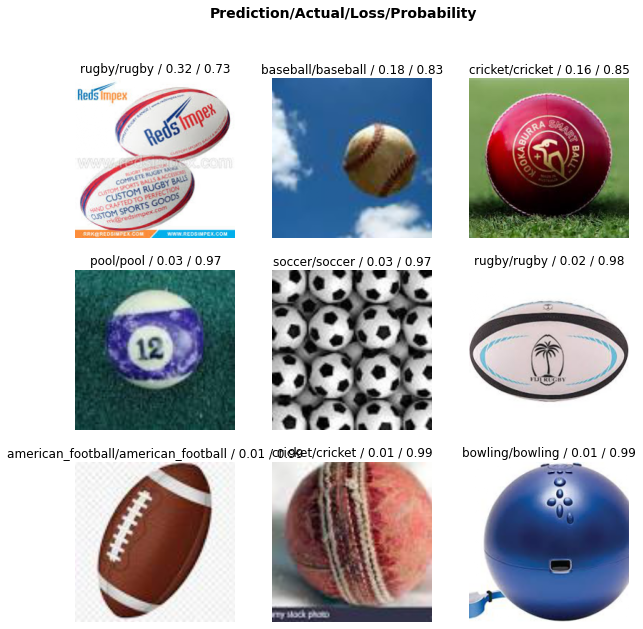

In [50]:
# plot top losses (most wrong)
interp.plot_top_losses(9, figsize=(10,10))

## Prediction on test data

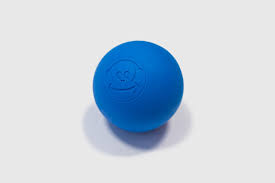

In [65]:
img1 = open_image(Path(root_path)/'balls_testing'/'lc.jpeg')
img1

In [66]:
pred_class,pred_idx,outputs = learn.predict(img1)
pred_class.obj

'lacrosse'

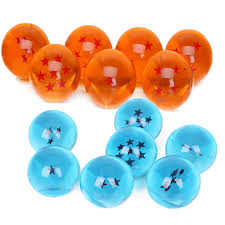

In [68]:
img2 = open_image(Path(root_path)/'balls_testing'/'db.jpeg')
img2

In [69]:
pred_class,pred_idx,outputs = learn.predict(img2)
pred_class.obj

'dragon'

Our model seems to predicting images correctly as expected.